## Demo 7: Two-Dimensional isotropic and anisotropic harmonic oscillator. <br>

### Introduction

In this in-class iPython notebook, we'll play around with the 2D Harmonic Oscillator. We'll plot the potential as 3D plot $V(x,y)$. <br>  We'll then write python functions that return the eigenfunctions of the isotropic and anisotropic Harmonic Oscillator. <br>We'll use these to plot the eigenfunctions that correspond to the anisotropic Harmonic Oscillator that is obtained after obtaining the normal modes for the linear triatomic molecule that is analyzed in the ** pencast The Multidimensional Schrodinger Equation**.

We'll **review** some of the stuff you've learned so far : 

1. The harmonic oscillator.

And we'll play around with some **new concepts** :

1. Plotting 3D functions in python. 
2. Generalization of the 1D harmonic oscillator to several dimensions.

### Have fun!

### <i class="fa fa-book"></i> Step 1: Import the required modules.

Some of these modules are related to 3D plotting, take note of those as you might need them for future homeworks.

In [1]:
% pylab inline
import numpy as np
from matplotlib import pyplot as plt
#we'll use the next one for 3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.integrate import simps
#We'll use misc and hermval to generate the eigenfunctions of the H.O. 
from scipy import misc
from numpy.polynomial.hermite import hermval
import imp
import pydoc ##this let's us print out the available functions in our library, as well as the documentation
#This is how we'll import our own homemade modules
qworld = imp.load_source('qworld', '../library/quantumWorld.py')

Populating the interactive namespace from numpy and matplotlib


### <i class="fa fa-book"></i> Step 2: create a grid for a 3D plot.

In order to make a 3D plot of $V(x,y)$, we'll need to create a meshgrid. **Read online the documentation and examples for numpy.meshgrid() function, which is used routinely to generate 2D or higher-dimensional grids.**
http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

In [2]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
xx, yy = np.meshgrid(x,y)

### <i class="fa fa-wrench"></i> Step 3: Obtain a potential for a 2D Harmonic Oscillator and plot it!

A particle in a 2D harmonic potential experiences a harmonic potential in each of the dimensions. Therefore, the potential corresponds to a function $V(x,y)$ that can be written as:

$$V(x,y) = \frac{1}{2}k_x(x - x_0)^2 + \frac{1}{2}k_y(y - y_0)^2$$ 

where $x_0$ and $y_0$ are the equilibrium coordinates and $k_x$ and $k_y$ are the two "spring constants". Next, we'll write a function that given as input a x-y meshgrid and $k_x$ and $k_y$, returns a 2D harmonic potential.

In [3]:
def harmonic_potential_2D(xx, yy, kx, ky, x0=0, y0=0):
    '''2-D harmonic oscillator potential, defined on a meshgrid
    INPUTS: 
        xx --> x-coordinate matrix of an x-y meshgrid
        yy --> y-coordinate matrix of an x-y meshgrid
        kx, ky --> spring constants
    '''
    ################# 
    # (ONE LINE) WRITE CODE THAT ASSIGNS TO THE VARIABLE Vxy, THE EXPRESSION ABOVE FOR V(x,y)
    ###################
    Vxy = (1/2.0)*kx*(xx - x0)**2+(1/2.0)*ky*(yy - y0)**2
    return Vxy

Let's set the values of the two spring constants and generate the potential:

In [4]:
kx = 0.1
ky = 0.1

Vxy = harmonic_potential_2D(xx, yy, kx, ky)

And now let's create a 3D plot of the potential. If you want to learn more about 3D plotting, check out this tutorial: 

http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

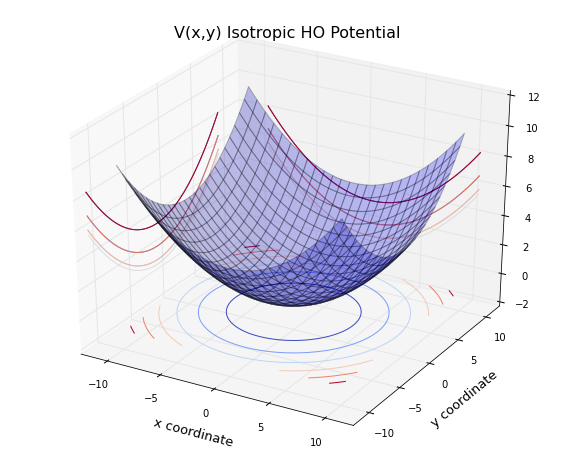

In [5]:
#Set the figure
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(111, projection = '3d')
#Plot as a surface
ax.plot_surface(xx, yy, Vxy, rstride = 8, cstride=8, alpha = 0.25)
#Set z, x, y, axes
ax.set_zlim3d(-2,12)
ax.set_xlim3d(-12,12)
ax.set_ylim3d(-12,12)
#This sets the angle at which we view the plot
ax.view_init(30, -60)

#THIS IS FANCY BUT USELESS: Plots the projections onto the xy, xz, yz planes
cset = ax.contour(xx, yy, Vxy, zdir='z', offset = -1, cmap = cm.coolwarm)
cset = ax.contour(xx, yy, Vxy, zdir='x', offset = -13, cmap = cm.coolwarm)
cset = ax.contour(xx, yy, Vxy, zdir='y', offset = 13, cmap = cm.coolwarm)

#label axes and add title
plt.xlabel('x coordinate', fontsize = 13)
plt.ylabel('y coordinate', fontsize = 13)
plt.title('V(x,y) Isotropic HO Potential', fontsize = 16)
plt.show()


Another way to visualize $V(x,y)$ is to plot the contour lines of equal value of the potential (isopotential lines). Look at the following code to create isocontour plots.

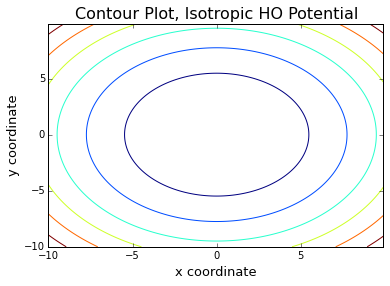

In [6]:
#Create new figure
fig, ax = plt.subplots()
#This is the function we call to create contours. 
cset = ax.contour(xx,yy,Vxy)
#Set axes labels and title
plt.xlabel('x coordinate', fontsize = 13)
plt.ylabel('y coordinate', fontsize = 13)
plt.title('Contour Plot, Isotropic HO Potential', fontsize = 16)
plt.show()

### <i class="fa fa-wrench"></i> Step 4: Write a function that returns the solutions to the 2D isotropic HO.

Next, we'll write a function that returns the analytic solution to the isotropic 2D Harmonic Oscillator potential.  **Refer to pencast The Multidimensional Schrodinger Equation : 2D Isotropic Harmonic Oscillator** Recall that these eigenfunctions are given by the somewhat complicated expression:<br>
$$\psi(x,y)=\frac{\sqrt{\frac{m\omega}{\pi\hbar}}}{\sqrt{2^l 2^m l! m!}}H_l(\sqrt{\frac{m\omega}{\hbar}}x)H_m(\sqrt{\frac{m\omega}{\hbar}}y)e^{-\frac{m\omega}{2\hbar}(x^2+y^2)} $$

Where $H_l$ and $H_m$ are the Hermite polynomials.

### <i class="fa fa-gear"></i> You might wonder, how does this formula relate to the formula for a 1D HO? Discuss it with your partners. 

and then proceed to complete the next function.

In [7]:
#Isotropic 2D harmonic oscillator
def harmonic_oscillator_2D(xx, yy, l, m, mass = 1.0, omega = 1.0, hbar = 1.0):
    '''Returns the wavefunction for the 2D isotropic Harmonic Oscillator, given the following inputs: 
    INPUTS: 
        xx --> x-axis values for a 2D grid 
        yy --> y-axis values for a 2D grid
        l --> l quantum number 
        m --> m quantum number
        mass --> mass (defaults to atomic units)
        omega --> oscillator frequency, defaults to atomic units. 
        hbar --> planck's constant divided by 2*pi
    '''
    #This is related to how the function np.polynomail.hermite.hermval
    #works.
    coeff_l = np.zeros((l+1, ))
    coeff_l[l] = 1.0
    coeff_m = np.zeros((m+1, ))
    coeff_m[m] = 1.0
    #Hermite polynomials required for the HO eigenfunctions
    hermite_l = np.polynomial.hermite.hermval(np.sqrt(mass*omega/hbar)*xx, coeff_l)
    hermite_m = np.polynomial.hermite.hermval(np.sqrt(mass*omega/hbar)*yy, coeff_m)
    #This is the prefactors in the expression for the HO eigenfucntions
    prefactor = (mass*omega/(np.pi*hbar))**(1.0/2.0)/(np.sqrt(2**l*2**m*misc.factorial(l)*misc.factorial(m)))
    ####################################
    # (ONE LINE) WRITE THE FORMULA FOR THE GAUSSIAN FUNCTION IN THE EXPRESSION FOR THE 2D ISOTROPIC HO
    #And the gaussians in the expression for the HO eigenfunctions
    gaussian = np.exp(-(mass*omega*(xx**2+yy**2))/(2.0*hbar))
    #####################################
    #The eigenfunction is the product of all of the above. 
    return prefactor*gaussian*hermite_l*hermite_m

### <i class="fa fa-wrench"></i> Step 5: Plot the isotropic wavefunctions.

As an exercise, plot different states of the isotropic 2D Harmonic oscillator to get a feel for what the wavefunctions look like.  Do this by modifying the two quantum numbers $l$ and $m$. Also play around with the tilt angle of the plot in order to visualize better the results.

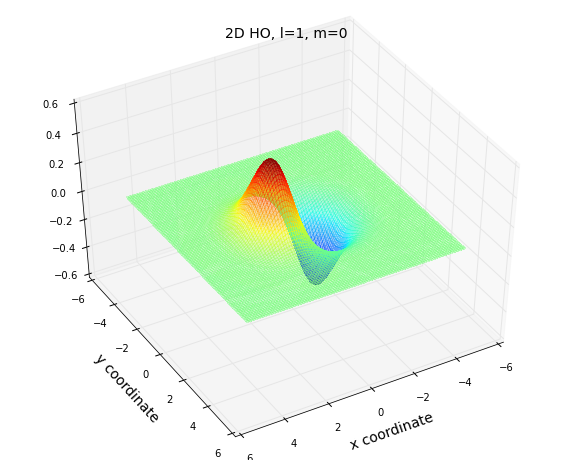

In [10]:
#########################
#########################
# (THREE LINES) CREATE A MESH GRID OVER WHICH WEĹL EVALUATE THE WAVEFUNCTIONS
#First, assign to the variable x a numpy array that goes from -5 to 5, intervals of 0.1
#Same for variable y
#assign to xx, yy a numpy meshgrid constructed using np.meshgrid
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
xx, yy = np.meshgrid(x,y)

##########################

#Define the relevant parameter values.  We'll use atomic units
mass = 1
omega = 1
hbar = 1

#############################################
#Define the values of the two quantum numbers.
# TRY DIFFERENT VALUES OF m AND l TO GET A SENSE OF HOW THE EIGENFUNCTION CHANGE (START WITH 0)
l=1
m=0
##############

########################################
# (ONE LINE) CALL THE HARMONIC OSCILLATOR 2D FUNCTION ABOVE, ASSIGN THE OUTPUT TO Psi_xy
#######################################
Psi_xy = harmonic_oscillator_2D(xx,yy,l,m)
#############################################

# Plotting
#Set figure
fig = plt.figure()
fig.set_size_inches(10, 8)
#add a subplot for '3d' plotting
ax = fig.add_subplot(111, projection = '3d')
#plot surface, with some  parameters. 
ax.plot_surface(xx, yy, Psi_xy, alpha = 0.4, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
# PLAY AROUND WITH THE TILT ANGLES TO HELP YOU VISUALIZE BETTER THE RESULTS
ax.view_init(45, 60)
#Add title and axes labels
plt.title('2D HO, l='+str(l)+', m='+str(m), fontsize=14)
plt.xlabel('x coordinate', fontsize=14)
plt.ylabel('y coordinate', fontsize=14)
plt.show()


### <i class="fa fa-wrench"></i> Step 6: write a function that returns eigenfunctions for a not-necessarily isotropic Harmonic Oscillator.  

**Notice that the function we wrote above is just a special case of this one. (we could get away with just using the next function, even for the case of the isotropic HO)**
The expression for the anisotropic harmonic oscillator is given by:

$$\psi(x,y)=A H_l(\sqrt{\frac{m_A\omega_A}{\hbar}}Q_A)H_m(\sqrt{\frac{m_B\omega_B}{\hbar}}Q_B)e^{-
\frac{m_A\omega_A}{2\hbar}Q_A^2}e^{-\frac{m_B\omega_B}{2\hbar}Q_B^2} $$ <br>

Where A is the appropriate normalization factor, and $Q_A$ and $Q_B$ are the normal mode coordinates. The following function returns the previous expression:

In [52]:
def harmonic_oscillator_2D_aniso(xx, yy, l, m, mass_1=1.0, mass_2=1, omega_1=1.0, omega_2=1, hbar = 1.0):
    '''Returns the wavefunction for the 2D anisotropic Harmonic Oscillator, given the following inputs: 
    INPUTS: 
        xx --> x-axis values for a 2D grid 
        yy --> y-axis values for a 2D grid
        l --> quantum number associated to x dimension
        m --> quantum number, associated to y dimension
        mass_1,_2 --> mass (defaults to atomic units)
        omega_1,_2 --> oscillator frequency, defaults to atomic units. 
        hbar --> planck's constant divided by 2*pi
    '''
    #This is related to how the function np.polynomail.hermite.hermval
    #works.
    coeff_l = np.zeros((l+1, ))
    coeff_l[l] = 1.0
    coeff_m = np.zeros((m+1, ))
    coeff_m[m] = 1.0                                                                     
    #Hermite polynomials required for the HO eigenfunctions
    hermite_1 = np.polynomial.hermite.hermval(np.sqrt(mass_1*omega_1/hbar)*xx, coeff_l)
    hermite_2 = np.polynomial.hermite.hermval(np.sqrt(mass_2*omega_2/hbar)*yy, coeff_m)
    # These are the prefactors in the expression for the HO eigenfucntions
    prefactor_1 = (mass_1*omega_1/(np.pi*hbar))**(1.0/4.0)/(np.sqrt(2**l*misc.factorial(l)))
    prefactor_2 = (mass_2*omega_2/(np.pi*hbar))**(1.0/4.0)/(np.sqrt(2**m*misc.factorial(m)))

    ###################################################################
    # (TWO LINES) WRITE THE FORMULAS FOR THE GAUSSIAN FUNCTIONS IN THE EXPRESSION FOR THE 2D ISOTROPIC HO
    #And the gaussians in the expression for the HO eigenfunctions
    gaussian_1 = np.exp(-(mass_1*omega_1*(xx**2))/(2.0*hbar))
    gaussian_2 = np.exp(-(mass_2*omega_2*(yy**2))/(2.0*hbar))
    ####################################################################

    #The eigenfunction is the product of all of the above. 
    psi = prefactor_1*prefactor_2*gaussian_1*gaussian_2*hermite_1*hermite_2
    return psi

And now lets plot the anisotropic wavefunctions that correspond to the potential we saw in the pencast Normal Modes of a Linear Triatomic Molecule : 
$$V(x,y) =\frac{1}{2}m_A\omega_A^2Q_A^2 + \frac{1}{2}m_B\omega_B^2Q_B^2 =  \frac{3}{2}m\omega_0^2Q_A^2 + \frac{1}{2}m\omega_0^2Q_B^2$$

Where $Q_A$ and $Q_B$ are the two eigenvectors of normal modes of the linear triatomic molecule. As an exercise, plot different states of the anisotropic 2D Harmonic oscillator to get a feel for what the wavefunctions look like.  Do this by modifying the two quantum numbers $l$ and $m$. Play around with the tilt angle of the plot in order to visualize better the results.

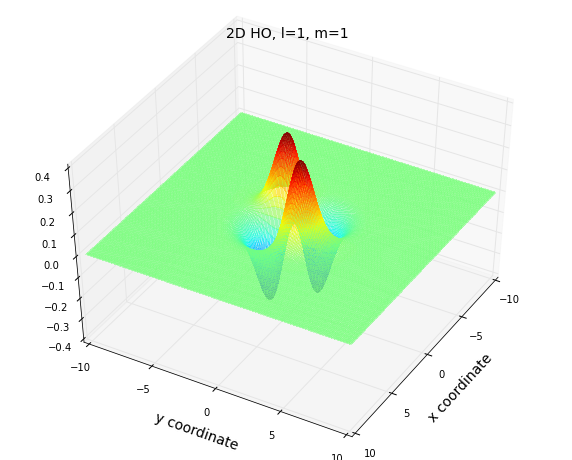

In [53]:
#Define the relevant parameter values.
m0 = 1
omega_0 = 1
#
mass_A = m0/6.0
mass_B = m0/2.0
omega_A = sqrt(18)*omega_0 
omega_B = sqrt(2)*omega_0 
hbar = 1


#############################################
#Define the values of the two quantum numbers.
# TRY DIFFERENT VALUES OF m AND l TO GET A SENSE OF HOW THE EIGENFUNCTIONS CHANGE (START WITH 0)
l=1
m=1
############################################

##################################################################################
# (ONE LINE) CALL THE harmonic_oscillator_2D_aniso FUNCTION ABOVE, ASSIGN THE OUTPUT TO psi
psi = harmonic_oscillator_2D_aniso(xx, yy, l, m, mass_A, mass_B, omega_A, omega_B)
###################################################################################

#plotting
#set figure
fig = plt.figure()
fig.set_size_inches(10, 8)
#add a subplot for '3d' plotting
ax = fig.add_subplot(111, projection = '3d')
#PLot a surface
ax.plot_surface(xx, yy, psi, alpha = 0.4, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
# PLAY AROUND WITH THE TILT ANGLES TO HELP YOU VISUALIZE BETTER THE RESULTS
ax.view_init(45, 30)

#Add title and legends
plt.title('2D HO, l='+str(l)+', m='+str(m), fontsize=14)
plt.xlabel('x coordinate', fontsize=14)
plt.ylabel('y coordinate', fontsize=14)
plt.show()

### <i class="fa fa-gear"></i> You might wonder, how does the number of nodal planes of the wavefunction relate to the values of l and m? Discuss it with your partners. 

## <i class="fa fa-book"></i> Step 7. Check out what you learned in this demo.<br>

### 1. Create 3D plots with python. <br>

### 2. The expressions for the quantum multidimensional harmonic oscillator and its solutions. <br>

### 3. The connections between the 1D harmonic oscillator and its multidimensional generalization.